# Logistic Regression

**Logistic Regression**은 classification에 주로 사용되는 regression중 하나이며, instance가 특정 class에 속할 확률을 측정해 binary classifier로 동작한다.

## Estimating Probabilities

Logistic Regression은 input feature의 weighted sum(bias도 더함)을 계산하는 것은 같지만, Linear Regression처럼 바로 결과 값을 출력하는 것이 아니라 아래의 식처럼 결과 값에 **logistic**을 취한 후 출력한다. 

**Logistic Regression model estimated probability (vectorized form)**

$\hat{p} = h_{\mathbf{\theta}}(\mathbf{x}) = \sigma \Big( \mathbf{x}^T \mathbf{\theta} \Big)$

$\sigma()$로 나타낸 logistic은 **sigmoid function**을 말하며, 0에서 1의 값을 출력한다. logistic fuction의 식은 다음과 같다.

**Logistic function**

$\sigma(t) = \dfrac{1}{1 + exp(-t)}$

Logistic(sigmoid) function의 그래프는 다음과 같다.

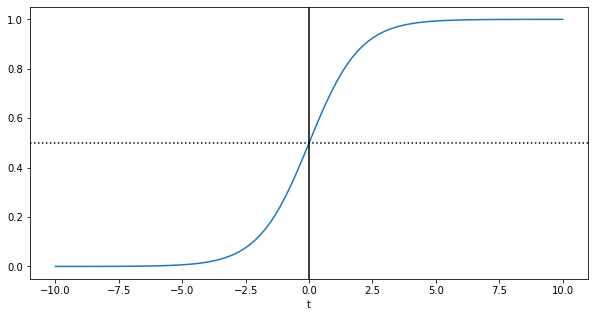

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    return 1/(1+np.exp(-t))


t = np.linspace(-10, 10, 100)
sigma = sigmoid(t)

plt.figure(figsize=(10, 5))
plt.plot(t, sigma)

plt.axvline(0.0, color='k')
plt.axhline(0.5, color='k', linestyle=':')
plt.xlabel("t")

plt.show()

Logistic function이 해당 class에 속할 probability $\hat{p} = h_{\mathbf{\theta}}(\mathbf{x})$를 계산하면, 다음의 식을 통해 prediction을 한다.

**Logistic Regression model prediction**

$\hat{y} = \begin{equation} \begin{cases} 0 & \text{if} & \hat{p} \lt 0.5 \\ 1 & \text{if} & \hat{p} \geq 0.5 \end{cases} \end{equation}$

정리하자면, $t \lt 0$일 때 $\sigma(t) \lt 0.5$이고, $t \geq 0$일 때 $\sigma(t) \geq 0.5$ 이므로, Logistic Regression은 $\mathbf{x}^T\mathbf{\theta}$가 positive이면, 1, negative이면, 0을 prediction한다는 것을 알 수 있다.

위의 Logistic function에서 t는 logit이라고 부르는데, 이는 logistic function의 inverse가 $\text{logit}(p) = \log(\frac{1}{1-p})$이기 때문이다.

## Training and Cost Function

Logistic Regression에서 training의 목표는 positive instance(y=1)에는 높은 확률을 갖도록 하고, negative instance(y=0)에는 낮은 확률을 갖도록 parameter vector $\mathbf{\theta}$를 설정하는 것이다. 이는 다음의 식으로 나타낼 수 있다.

**Cost function of a single training instance**

$c(\mathbf{\theta}) = \begin{equation} \begin{cases} -\log(\hat{p}) & \text{if} & y=1 \\ -\log(1-\hat{p}) & \text{if} & y=0 \end{cases} \end{equation}$

전체 training set에 대한 cost function은 전체 training instance에 대한 cost를 평균내면 된다. 이는 **log loss**라고 부르는 다음의 식으로 나타낼 수 있다.

**Logistic Regression cost function(log loss)**

$J(\mathbf{\theta}) = -\dfrac{1}{m} \sum^m_{i=1} \Big[ y^{(i)} \log\big(\hat{p}^{(i)}\big) + \big(1-y^{(i)}\big) \log\big(1-\hat{p}^{(i)}\big) \Big]$

위의 식(cost function)을 최소로 만드는 $\mathbf{\theta}$를 구하기 위한 closed-form equation은 존재하지 않지만(해당하는 Normal Equation이 없음), 이 cost function은 convex하므로, Gradient Descent(또는 다른 optimization algorithm)를 통해 global minimum을 찾을 수 있다.

j번째 parameter $\theta_j$에 대한 cost function의 partial derivatives는 다음과 같다.

**Logistic cost function partial derivatives**

$\dfrac{\partial}{\partial \theta_j} J(\mathbf{\theta}) = \dfrac{1}{m} \sum^m_{i=1} \Big( \sigma \big(\mathbf{\theta}^T\mathbf{x}^{(i)}\big) - y^{(i)}\Big)x^{(i)}_j$

위의 식을 통해 모든 partial derivatives로 구성된 gradient vector를 구하면, Batch Gradient Descent 알고리즘을 사용할 수 있다. Stochastic과 Mini-batch의 경우에도 해당 instance의 수에 따라서 위 식을 적용하면 된다.

## Decision Boundaries

Iris dataset을 사용해 Logistic Regression을 나타내보자. 

Iris dataset은 Iris-Setosa, Iris-Versicolor, Iris-Virginica의 3개 class가 있고, feature는 sepal width, sepal length, petal width, petal length로 총 4개가 있다.

<br/>
<img src="./images/iris_dataset.png" alt="iris_dataset" width="80%"> 
<br/>

먼저, petal width만을 사용해 Iris-Virginica에 대한 binary classifier를 만들어보자.

In [2]:
# dataset 불러오기
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [3]:
# petal width만
X = iris["data"][:, 3:]

# Iris-Virginica이면 1, 아니면 0
y = (iris["target"] == 2).astype(np.int)

이제 Logistic Regression 모델을 학습시키고 petal width가 0에서 3까지 변할 때, model의 확률을 살펴보자.

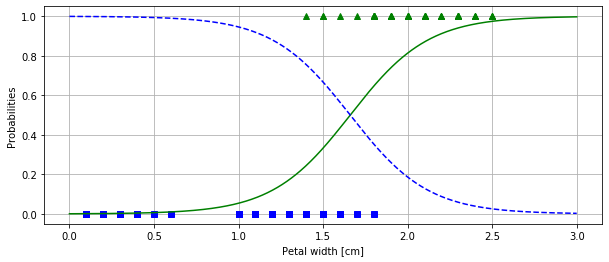

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(10, 4))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal width [cm]")
plt.ylabel("Probabilities")
plt.grid()
plt.show()

Iris-Virginica(초록색 세모)의 petal width 범위는 1.4cm에서 2.5cm이고, Iris-Virginica가 아닌 경우(파란색 네모)의 petal width 범위는 0.1에서 1.8cm이므로 중간에 약간 겹치는 부분이 있다.

이 부분(구간)에서 classifier가 50%라고 예측하는 지점(약 1.6cm)이 있는데 이를 **decision boundary**라고 한다.(위 그림에서 두 그래프가 만나는 위치)

`predict()`를 사용해 확인해보자.

In [5]:
print(log_reg.predict([[1.7], [1.5]]))

[1 0]


다음의 코드는 2개의 feature(petal width와 length)를 사용해 나타낸 것이다. 중앙의 dash line은 50%의 확률일 때를 나타내며 model의 decision boundary이다. decision boundary가 linear한 형태이다.

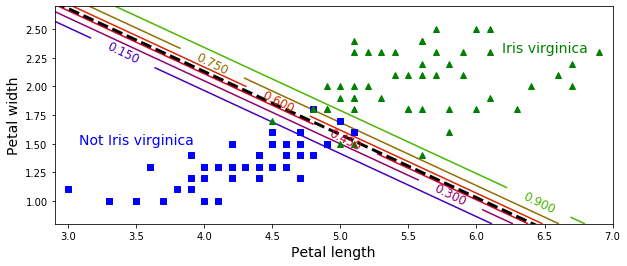

In [6]:
# 저자의 github에서 참고하였음

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

다른 Linear Regression model들처럼, Logistic Regression model도 $l_1, l_2$ penalty를 통해 regularization을 적용할 수 있다.

사이킷런의 `LogisticRegression`은 다른 모델들처럼 `alpha`를 통해 regularization strength를 조절하는 것이 아니라, 역수 값인 `C`를 통해 조절한다. 따라서, `C`값이 커지면 regularization이 약하게 적용되는 것이다.

## Softmax Regression

Logistic Regression model은 여러 개의 binary classifier를 합친 형태가 아니라 직접 multi-class classification을 수행하기 위해 일반화 될 수 있는데, 이를 **Softmax Regression** 또는 **Multinomial Logistic Regression**이라고 한다.

Softmax Regression model은 주어진 instance $\mathbf{x}$에 대해 각 class $k$에 대한 score $s_k(\mathbf{x})$를 계산하고, **normalized exponential**라고도 부르는 **softmax function**을 통해 각 class에 대한 확률을 계산한다. 이를 좀 더 자세히 살펴보자.

**Softmax score for class k**

$s_k(\mathbf{x}) = \mathbf{x}^T \mathbf{\theta}^{(k)}$

각 class는 자신만의 paramter vector $\mathbf{\theta}^{(k)}$를 가지며, 이들 전체 벡터를 **parameter matrix $\mathbf{\Theta}$**라고 하며, 각 vector는 이 matrix에 row로 저장된다.

위의 식을 통해 instance $\mathbf{x}$에 대해 모든 class의 score가 계산되면, softmax function을 통해 instance가 class k일 확률 $\hat{p}_k$를 계산한다.

softmax function은 모든 score의 exponential을 계산하고, 이들을 (모든 exponential의 합으로 나누어) normalize한다. softmax function의 식은 다음과 같다.

**Softmax function**

$\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \dfrac{ \exp\big(s_k(\mathbf{x})\big)}{\sum^K_{j=1} \exp\big(s_j(\mathbf{x})\big)}$
- $K$ : class 수
- $\mathbf{s}(\mathbf{x})$ : instance $\mathbf{x}$에 대한 class별 scores를 가지고 있는 vector
- $\sigma(\mathbf{s}(\mathbf{x}))_k$ : instance에 대한 class별 scores로 estimated된 instance $x$가 class $k$일 확률

Logistic Regression classifier와 같이, Softmax Regression classifier도 높은 확률로 estimated된 class로 예측한다.(높은 score의 class를 예측하는 것)

**Softmax Regression classifier prediction**

$\hat{y} = \text{argmax } \sigma(\mathbf{s}(\mathbf{x}))_k =   \text{argmax } s_k(\mathbf{x}) = \text{argmax }\Big( \big( \mathbf{\theta}^{(k)} \big)^T \mathbf{x} \Big)$

- $\text{argmax}$ 연산은 함수를 최대화 하는 변수의 값을 반환하는 연산이다. 위 식에서는 확률 $\sigma(\mathbf{s}(\mathbf{x}))_k$이 최대가 되는 k의 값(class의 index)를 반환한다.

Softmax Regression classifier를 training하기 위한 cost function은 **cross entropy**라고 부른다. Cross entropy는 estimated class probability들이 target class들과 얼마나 잘 맞는지를 측정할 때 자주 사용된다.

**Cross entropy cost function**

$J(\mathbf{\Theta}) = -\dfrac{1}{m} \sum^m_{i=1} \sum^K_{k=1} y_k^{(i)} \log \big( \hat{p}_k^{(i)} \big)$
- $y_k^{(i)}$ : i번째 instance가 class k에 속할 target probability, 일반적으로 class인지 아닌지를 의미하므로 1 또는 0의 값이 된다.

위 식은 2개의 class(K=2)일 경우에 Logistic Regression의 cost function의 식과 같아진다.

Cross entropy(cost function)의 $\mathbf{\theta}^{(k)}$에 대한 gradient vector는 다음과 같이 계산한다.

**Cross entropy gradient vector for class k**

$\nabla_{\mathbf{\theta}^{(k)}} J(\mathbf{\Theta}) = \dfrac{1}{m}\sum^m_{i=1} \big(\hat{p}_k^{(i)} - y_k^{(i)}\big) \mathbf{x}^{(i)}$

이제 모든 class에 대해 gradient vector를 계산하고, Gradient Descent(또는 다른 optimization algorithm)를 수행하면, cost function을 최소화하는 parameter matrix $\mathbf{\Theta}$를 구할 수 있다.

---

### Cross Entropy

Cross entropy는 information theory에서 유래되었다. 매일 날씨 정보를 효율적으로 전송하고 싶다고 가정해보자. 만약, 날씨의 종류가 8개(sunny, rainy 등)라면, 3개의 bit($2^3=8$)를 이용해 전달할 수 있을 것이다.

하지만 만약, 대부분의 날씨가 sunny라면, sunny를 나타내는 bit를 따로 두어서 sunny일 경우에는 1개의 bit(0)을 보내고, 나머지 7개의 다른 날씨의 경우에는 4개의 bit(첫번째 bit가 1로 시작)를 보내는 것이 훨씬 효율적일것이다.

Cross entropy는 option(여기서는 날씨)에 따라 실제 전송한 평균 bit의 수를 측정한다. 만약, 날씨 예측이 완벽하다면, cross entropy는 날씨 자체의 entropy(예측 불가능한 고유의 성질)와 동일할 것이다. 하지만 예측이 틀리다면(예를 들어, rainy가 자주 일어난 경우), cross entropy는 **Kullback-Leibler divergence**라고 부르는 양만큼 커질것이다.

두 확률분포 p와 q 사이의 cross entropy는 다음의 식으로 정의한다.

$H(p, q) = -\sum_x p(x) \log q(x)$ (discrete case)


---

Softmax Regression을 Iris dataset의 3개 class를 분류하는데 사용해보자.

사이킷런의 `LogisticRegression`은 2개 이상의 class를 학습시킬 때, one-versus-all이 default이지만 `multi_class` hyperparameter를 `"multinomial"`로 설정하면 Softmax Regression을 사용할 수 있다. 또한, Softmax Regression을 사용하려면, `solver="lbfgs"`로 설정해 주어야 한다. 마찬가지로 $l_2$ regularization이 default이며, hyperparameter `C`를 통해 strength를 조절할 수 있다.

In [7]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

# 5cm의 길이와 2cm의 폭을 가지는 경우로 예측해보기
print(softmax_reg.predict([[5, 2]])) # class
print(softmax_reg.predict_proba([[5, 2]])) # 각 class별 probability

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


다음은 위 결과의 decision boundary를 그리는 코드이다. 마찬가지로, decision boundary들은 linear한 형태를 띈다.

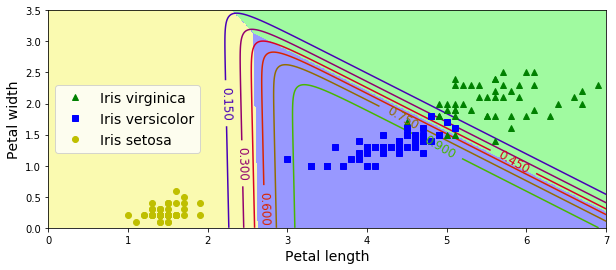

In [8]:
# 저자의 github에서 참고하였음

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()